<a href="https://colab.research.google.com/github/SmartPracticeschool/SBSPS-Challenge-2700-Twitter-Sentiment-Analysis-Extraction-for-COVID-19/blob/master/Notebooks/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#*Import Modules*#

In [ ]:
import os
import glob
import nltk
import string
import missingno
import unicodedata
import re
import pandas as pd
import numpy as np
import seaborn as sns
color = sns.color_palette()
import matplotlib.pyplot as plt
from plotly import graph_objects as go
nltk.download('stopwords')
from nltk.corpus import stopwords
eng_stopwords = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#Exploratory Data Analysis#

Exploratory Data Analysis (EDA) refers to the critical process of performing initial investigations on data so as to discover patterns, to spot anomalies, to test hypotheses and to check assumptions with the help of summary statistics and graphical representations.
                

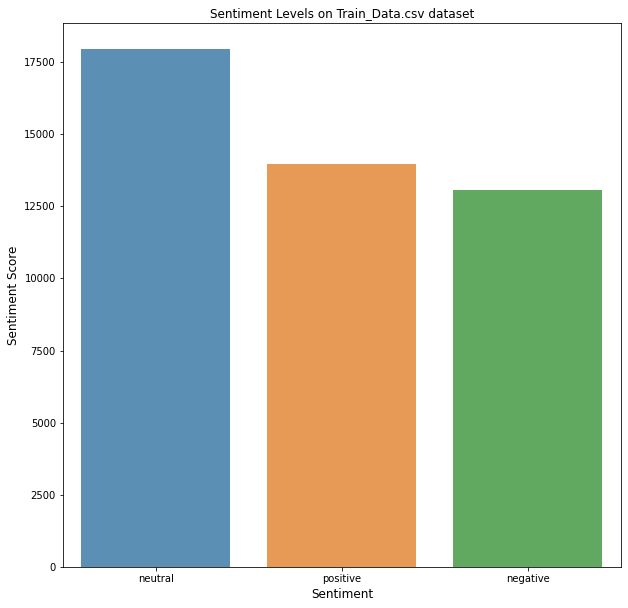

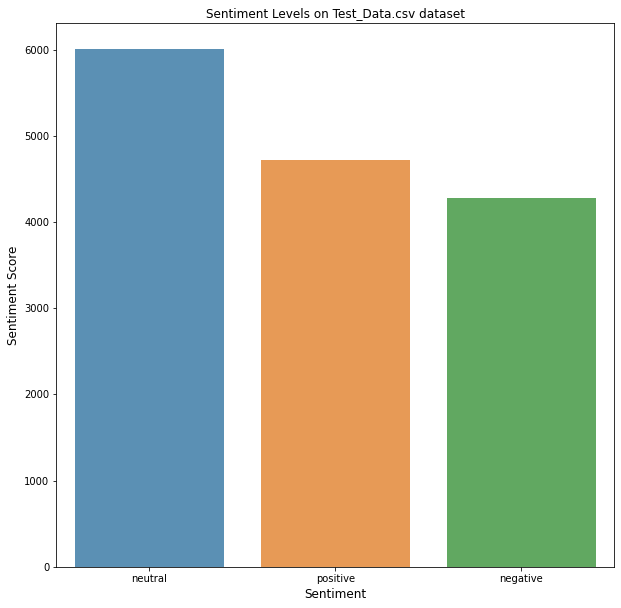

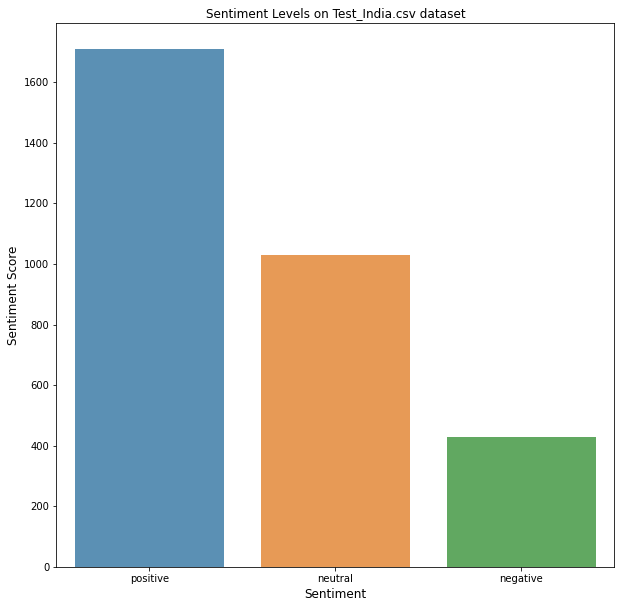

In [ ]:
# Plotting Bar diagram indicating Sentiment with Sentiment Score
Path = "/content/drive/My Drive/IBM_Hackathon_2020/Final_Datasets/*.csv"
csv_list = glob.glob(Path)# collecting all files having same path 
mylist=csv_list[1:4]
for f in mylist:
  df=pd.read_csv(f)#reading the csv file
  data=df.Sentiment.value_counts()#Creating the dataframe of Sentiment values and its count
  base = os.path.basename(f)#name of the file in the path
  plt.figure(figsize=(10,10))
  plt.xlabel("Sentiment",fontsize=12)
  plt.ylabel("Sentiment Score",fontsize=12)
  plt.title("Sentiment Levels on "+str(base)+" dataset")
  sns.barplot(data.index,data.values,alpha=0.8)

By plotting the bar and funnel graph on the basis of sentiments and the sentiment score, it is clear that there is not much of a difference in the sentiment trend prevalant in India when compared to the rest of the world. From the tweets it can be inferred that people are mostly neutral or positive about the pandemic, with only a very few people being negative towards it.

In [ ]:
#Plotting the Funnel graph for better visualization ofSentiment levels
for f in mylist: 
  df=pd.read_csv(f)
  data=df.Sentiment.value_counts()
  base = os.path.basename(f)
  fig = go.Figure(go.Funnelarea(
      values = data.values, text = ["Neutral","Positive","Negative"],
      marker = {"colors": ["deepskyblue", "lightsalmon", "tan"],
      
              "line": {"color": ["wheat", "wheat", "wheat"]}},
                 title = {"position": "top center", "text": "Sentiment levels on "+str(base)+" dataset"}))
  fig.show()   

The next step is to perform analysis on the data to get insights regarding the text data. The exploratory data analysis also helps in predicting the strengths and weakness of model because through observation of trends in the data it can be seen that which factors influence the model's generalization capability. The initial approach is to study the frequency of words appearing in the different dataset used. When implemented it was evident, as expected, that english stopwords and punctuations had a high frequency in the data. So, the approach was to clean the data for Analysis by removing the stopwords in nltk module and also punctuation marks. The following code block is used for refining data for analysis.



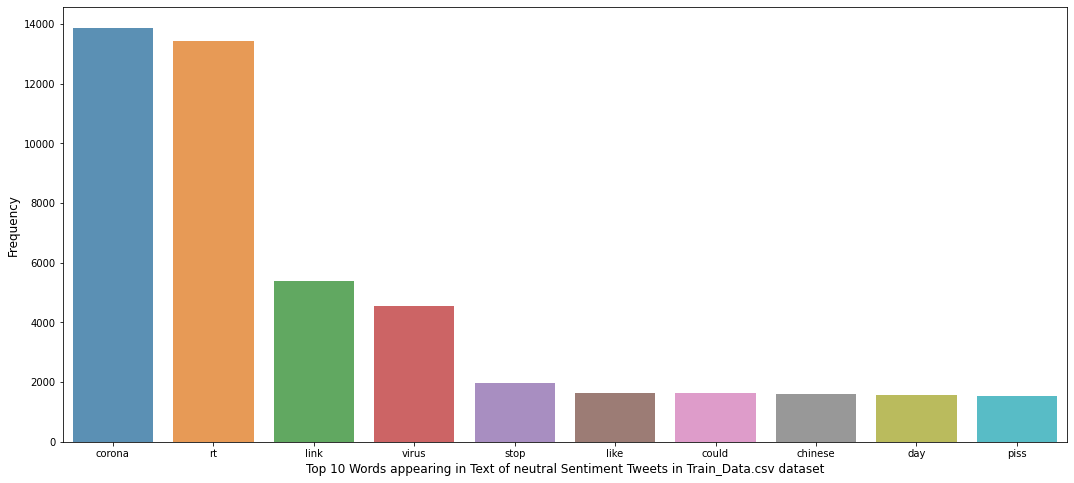

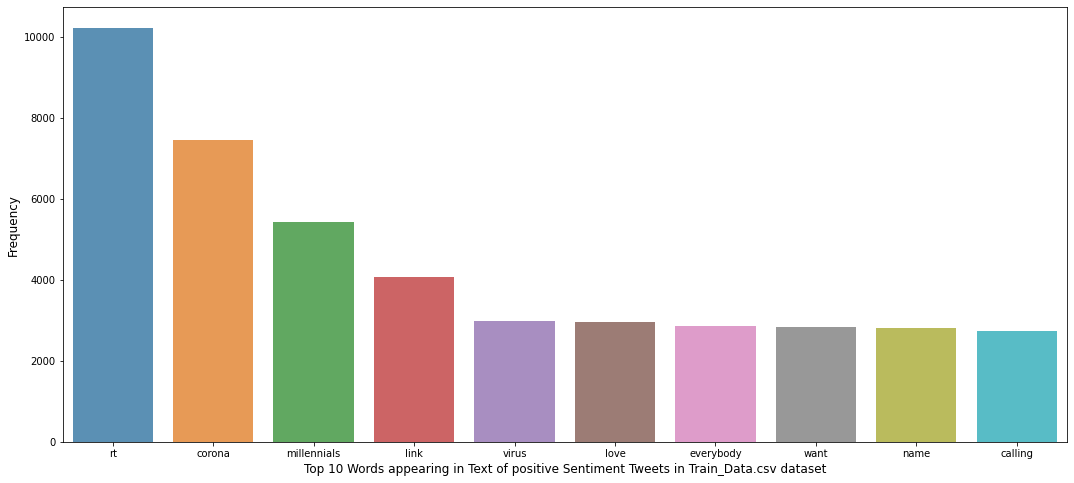

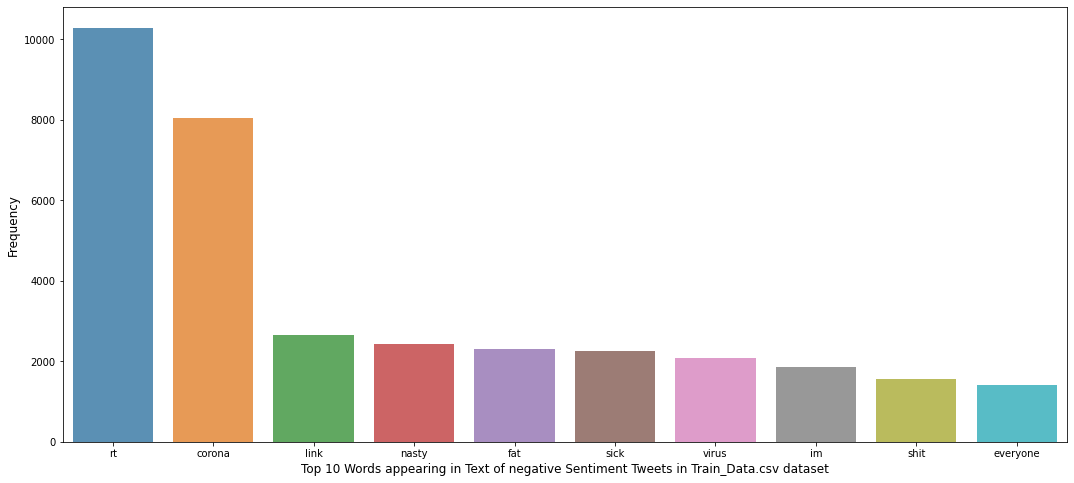

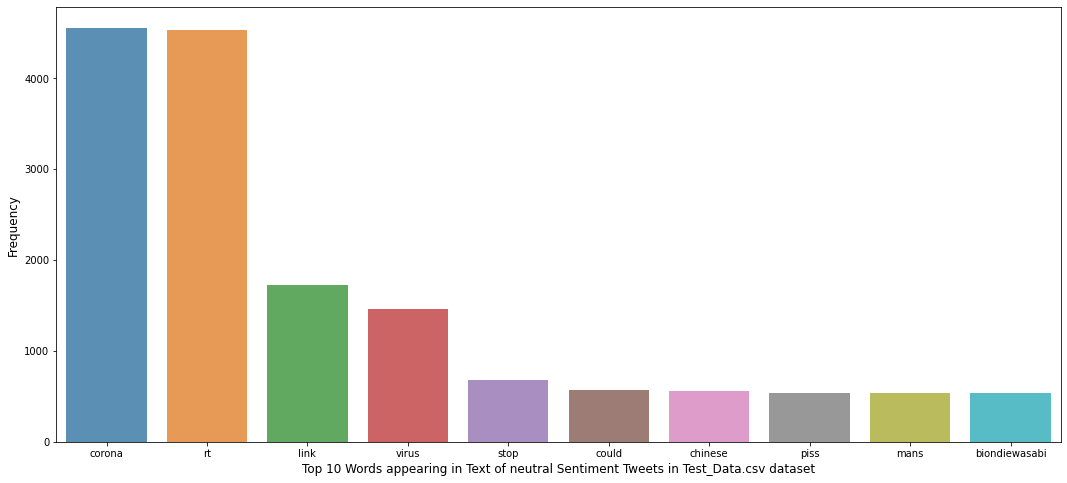

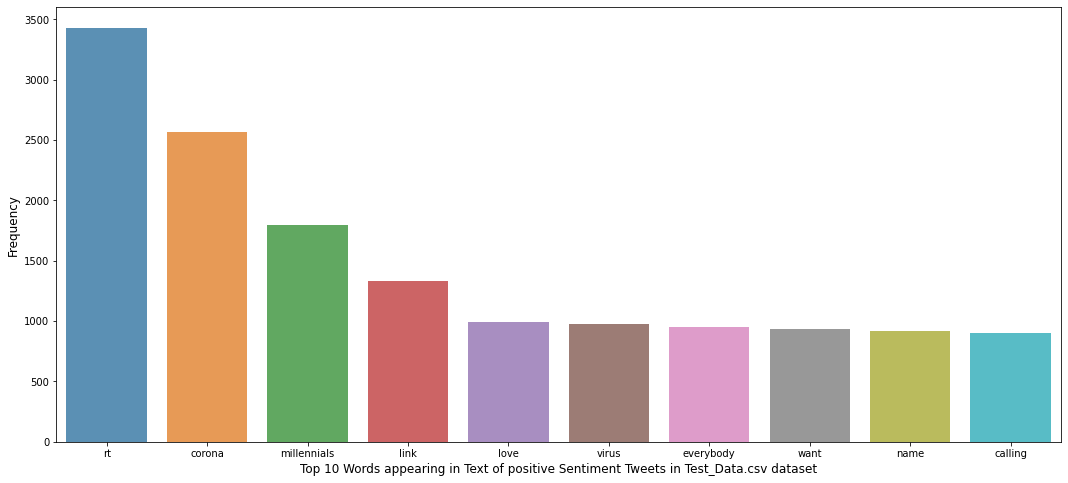

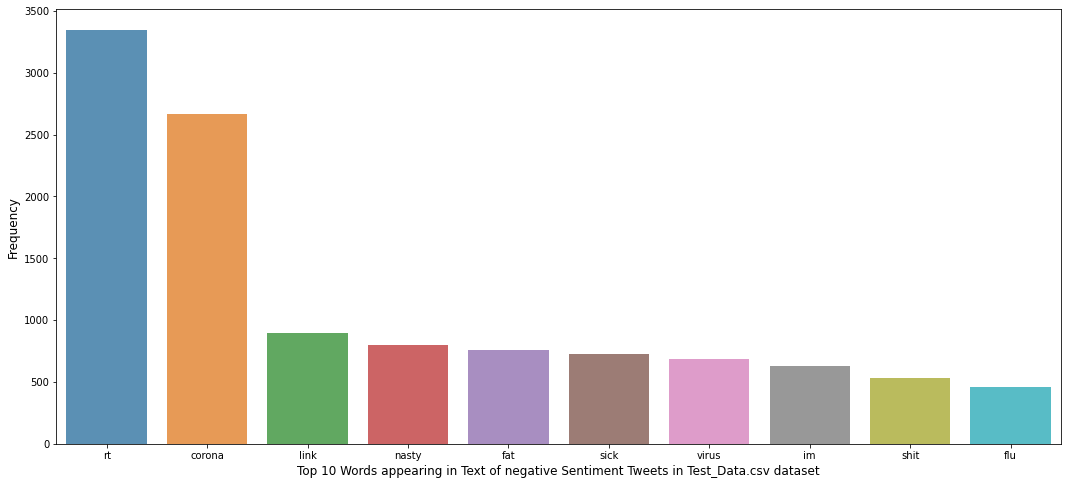

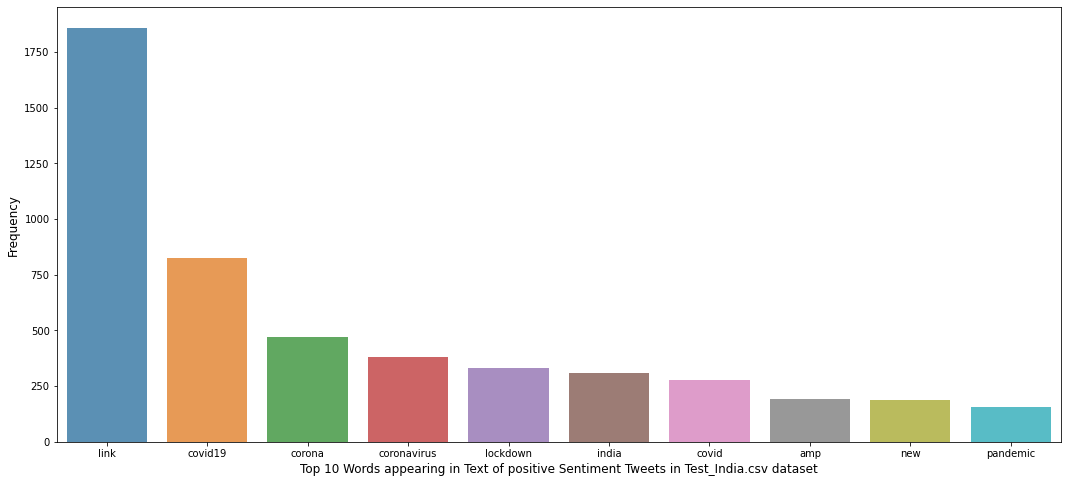

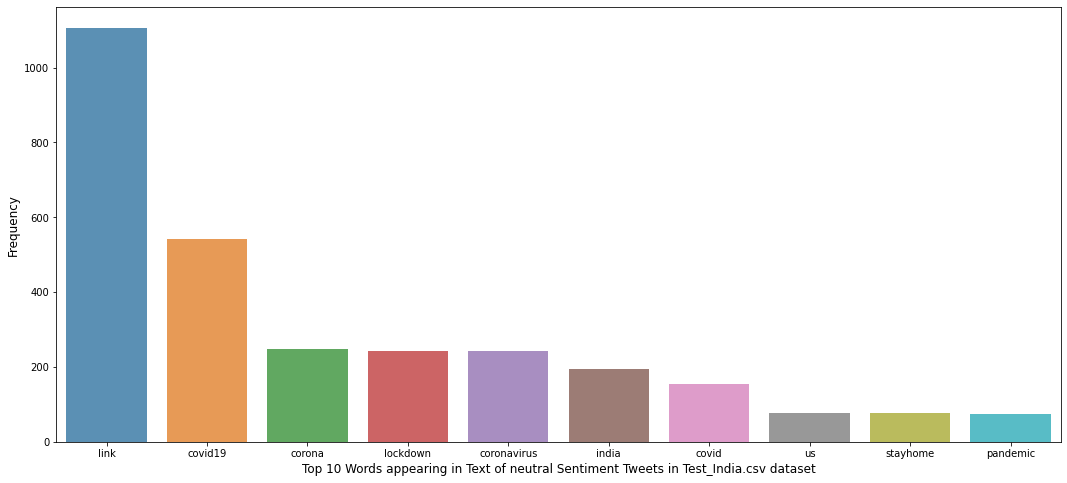

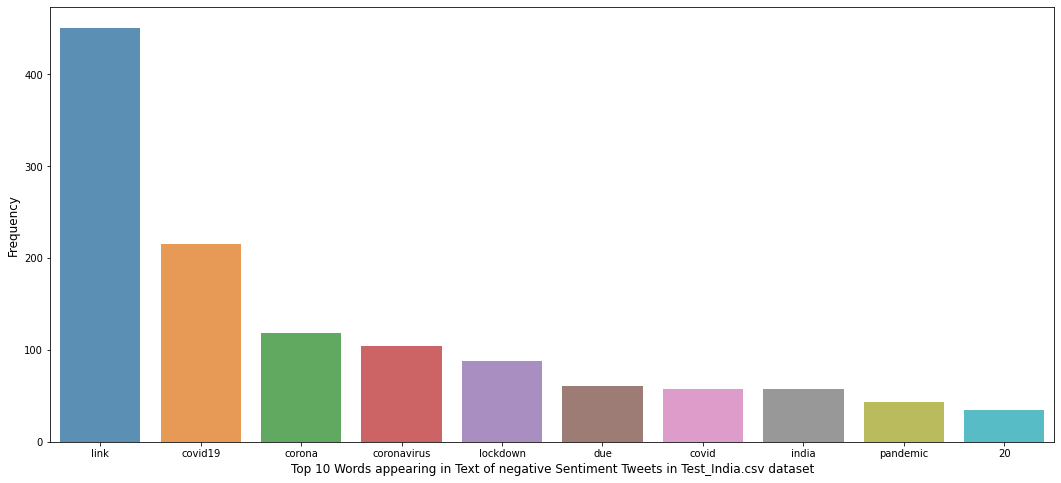

In [ ]:
#Plotting the bar graph of top frequently 10 occuring words for each Sentiment in each datset
for f in mylist: 
  df=pd.read_csv(f)
  base = os.path.basename(f)
  data=df.Sentiment.value_counts()
  Analysis_Data = df
  Analysis_Data["full_text"]= Analysis_Data["full_text"].str.lower()#converting the text into lowercase
  Analysis_Data['full_text'] = Analysis_Data['full_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (eng_stopwords)]))#removing the english stopwords
  Analysis_Data['full_text'] = Analysis_Data['full_text'].str.replace('[^\w\s]','')#removing the emojis
  for i in range(0,3):
    Sentiment = Analysis_Data[Analysis_Data['Sentiment'] == data.index[i]]#Creating the dataframe of having same sentiment
    Word_frequency = pd.Series(' '.join(Sentiment.full_text).split()).value_counts()[:10]#Calculating the words frequency
    plt.figure(figsize=(18,8))
    sns.barplot(Word_frequency.index, Word_frequency.values, alpha=0.8)
    plt.ylabel('Frequency', fontsize=12)
    plt.xlabel('Top 10 Words appearing in Text of '+str(data.index[i])+' Sentiment Tweets in '+str(base)+' dataset', fontsize=12)
    plt.show()

From the above frequency graphs and trends it is clearly evident that the most frequently used terms by twitterati in India and the rest of the world are "Corona" and "COVID-19" when compared to the other words. "rt", the most frequntly used term in the world dataset, means "retweet". The high usage of the word in this pandemic could be attributed to the fact that people showed great enthusiasm in retweeting the tweets related coronavirus, so it can be understood that the model should not generalize and classify tweets based on the presence of word "Corona", "COVID-19" and "rt". The trends from the graphs plotted above further strengthen our belief that the Indian dataset is similar to the world dataset in terms of sentiments expressed. Words like "fat" and "sick" have frequent occurrences in tweets, showing that people started paying attention to their health more than they previously did. "Love" was the most frequently used positive term and "nasty" was the most used negative term.

Finally, the frequency distribution plotted above gives us a good perspective of the dataset and also gives us an insight into predicting the model's generalization capability.

On Train_Data.csv Dataset


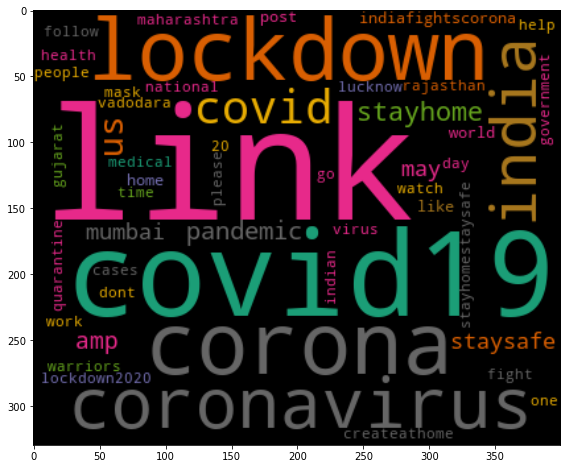

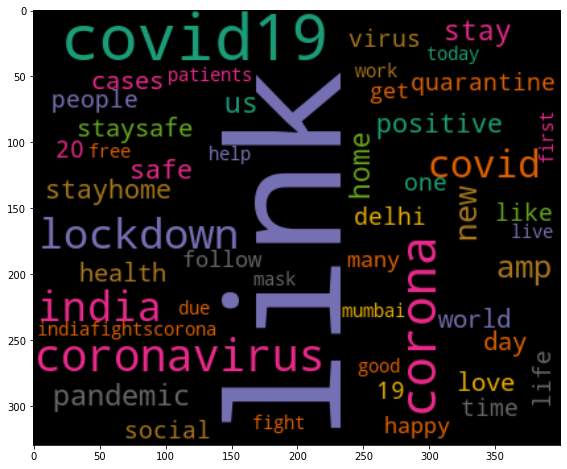

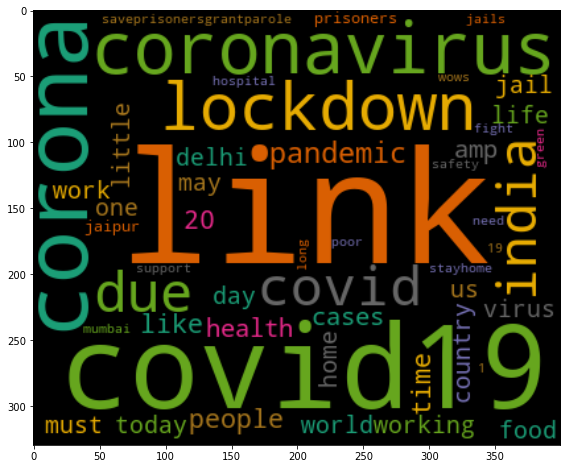

On Test_Data.csv Dataset


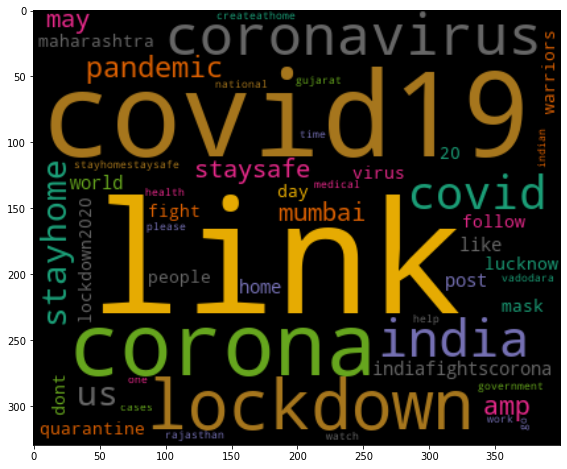

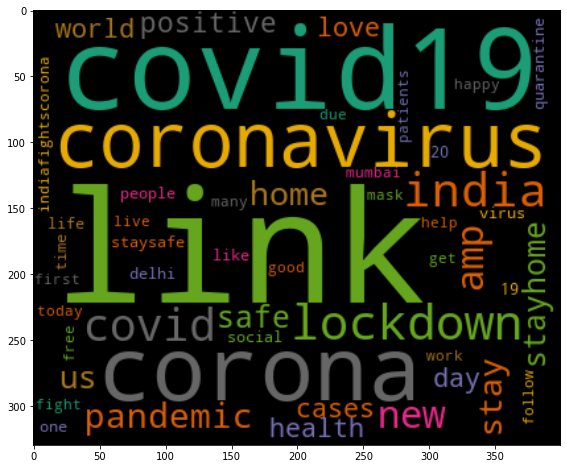

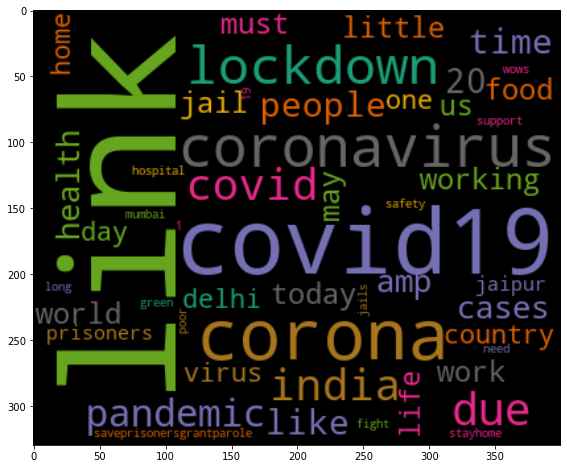

On Test_India.csv Dataset


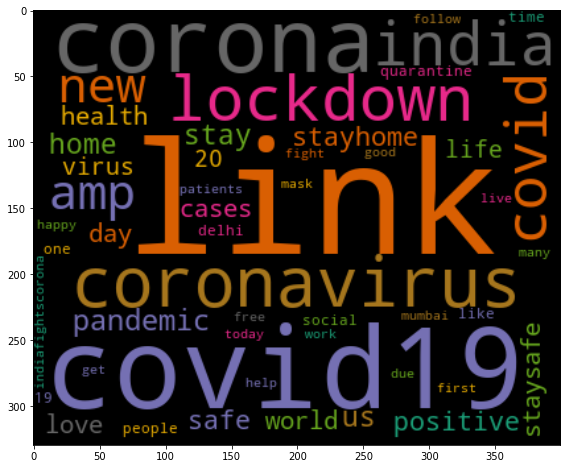

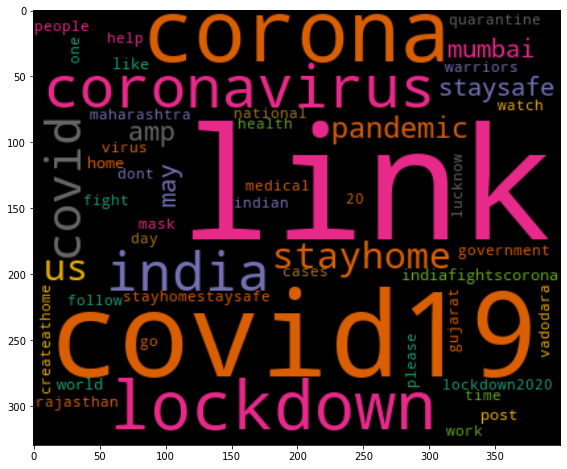

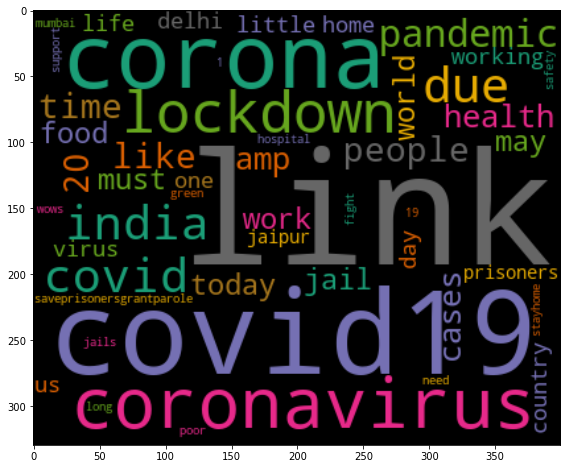

In [ ]:
#looking at the common words present in the tweets for each Sentiment
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.show()
# Plotting word cloud for each Sentiment in each data Sentiment
for f in mylist: 
  df=pd.read_csv(f)
  data=df.Sentiment.value_counts()
  base = os.path.basename(f)
  print("On "+str(base)+" Dataset")
  for i in range(3):
    Sentiment = Analysis_Data[Analysis_Data['Sentiment'] == data.index[i]]
    Word_frequency = pd.Series(' '.join(Sentiment.full_text).split()).value_counts()[:50] 
    generate_wordcloud(Word_frequency.sort_values(ascending=False),data.index[i])

#Statistical Analysis#


In this approach, the data will not be pre-processed to remove stopwords and punctuations as they usually tend to contribute to the performance of deep learning models. The following code is used to normalize the data through soft pre-processing.

In [ ]:
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
    )
def normalizeString(s):
    if not isinstance(s, float):
      s = unicodeToAscii(s.lower().strip())
      s = re.sub(r"([.!?])", r" \1", s)
      s = re.sub(r"[^a-zA-Z.!?]+", r" ", s)
    return s


The following code is used to obtain the following metafeatures: 'Num_words', 'Num_unique_words', 'Num_chars', 'Num_stopwords', 'Num_punctuations', 'Num_words_upper', 'Mean_word_len'.

In [ ]:
Analysis_Data = pd.read_csv("/content/drive/My Drive/IBM_Hackathon_2020/Final_Datasets/Data.csv")
Analysis_Data['full_text'] = Analysis_Data["full_text"].apply(lambda x: normalizeString(x)) #Normalising the string
Analysis_Data["num_words"] = Analysis_Data['full_text'].apply(lambda x: len(str(x).split()))#calculating the number of words in each tweet
Analysis_Data["num_unique_words"] = Analysis_Data['full_text'].apply(lambda x: len(set(str(x).split())))#Calculating the number of words
Analysis_Data["num_chars"] = Analysis_Data['full_text'].apply(lambda x: len(str(x)))#Calculating the number of characters
Analysis_Data["num_stopwords"] = Analysis_Data['full_text'].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))#Calculating the number of stop words
Analysis_Data["num_punctuations"] = Analysis_Data['full_text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )
Analysis_Data["num_words_upper"] = Analysis_Data['full_text'].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
Analysis_Data["mean_word_len"] = Analysis_Data['full_text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))   

Next, pandas DataFrame function describe( ) is used to obtain a statistical inference of the various metafeatures.

In [ ]:
Analysis_Data.describe()

,id,retweet_count,num_words,num_unique_words,num_chars,num_stopwords,num_punctuations,num_words_upper,mean_word_len
count,6.000100e+04,59999.000000,60001.000000,60001.000000,60001.000000,60001.000000,60001.0,60001.0,60001.000000
mean,1.241172e+18,21725.070918,17.728655,16.593507,101.357177,6.510325,0.0,0.0,4.859758
std,5.934356e+15,33556.650616,8.771236,7.628158,49.254401,4.568096,0.0,0.0,0.802001
min,3.000000e+00,0.000000,1.000000,1.000000,8.000000,0.000000,0.0,0.0,1.900000
25%,1.240755e+18,1.000000,11.000000,10.000000,61.000000,3.000000,0.0,0.0,4.333333
50%,1.240793e+18,1098.000000,19.000000,18.000000,109.000000,6.000000,0.0,0.0,4.782609
75%,1.240827e+18,35426.000000,23.000000,22.000000,131.000000,9.000000,0.0,0.0,5.285714
max,1.273469e+18,234463.000000,96.000000,88.000000,789.000000,37.000000,0.0,0.0,35.000000


In the above table we can observe the various statistical elements such as mean, standard deviation, different percentiles for the different meta features. The above table helps us gauge various aspects of the data and also is a potential indicator of model performance. As known, a deep learning model performance is based on the data used to train it, so here the mean number of words can give us a general idea of model performance on various sequence lengths.